In [24]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [25]:
furniture = pd.read_excel("C:\\Users\\DELL\\OneDrive\\Desktop\\Data Science\\ML\\Excel Data\\Super_Store.xls")
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [26]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [27]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True)
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [28]:
furniture = furniture.sort_values('Order Date')

#print the sorted values
print(furniture.head(1))

#check any missing values
furniture.isnull().sum()

     Order Date   Sales
7980 2014-01-03  16.448


Order Date    0
Sales         0
dtype: int64

In [29]:
furniture.groupby('Order Date')['Sales'].sum().reset_index()

# min and max values of Order Date
print(furniture['Order Date'].min())
print(furniture['Order Date'].max())

2014-01-03 00:00:00
2017-12-30 00:00:00


In [30]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-04', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-06', '2014-01-06',
               '2014-01-06', '2014-01-06',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-30',
               '2017-12-30', '2017-12-30', '2017-12-30', '2017-12-30',
               '2017-12-30', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [52]:
y = furniture['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01    283.686284
2017-02-01    189.730219
2017-03-01    247.362827
2017-04-01    179.909045
2017-05-01    182.897150
2017-06-01    216.251942
2017-07-01    200.285027
2017-08-01    289.545358
2017-09-01    191.430614
2017-10-01    260.996387
2017-11-01    258.056264
2017-12-01    181.448742
Freq: MS, Name: Sales, dtype: float64

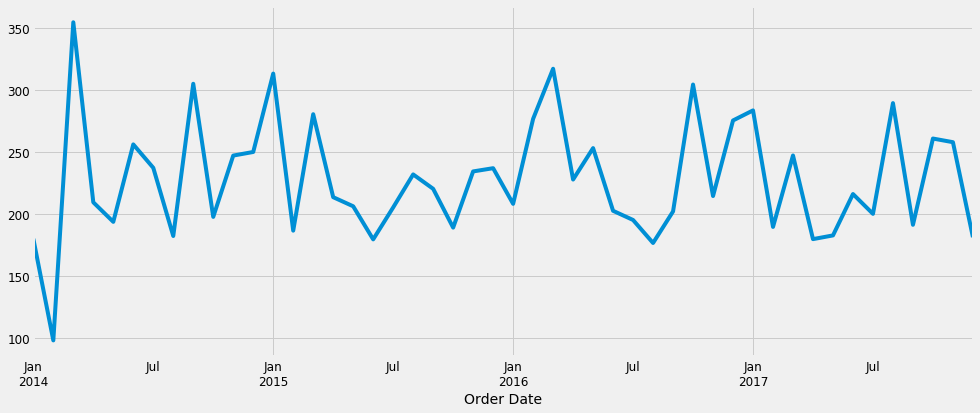

In [53]:
y.plot(figsize = (15, 6))
plt.show()

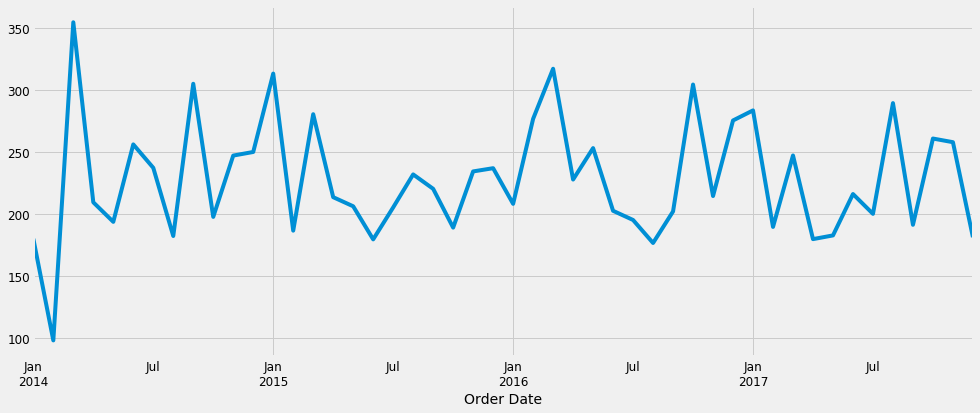

In [54]:
m.plot(figsize = (15, 6))
plt.show()

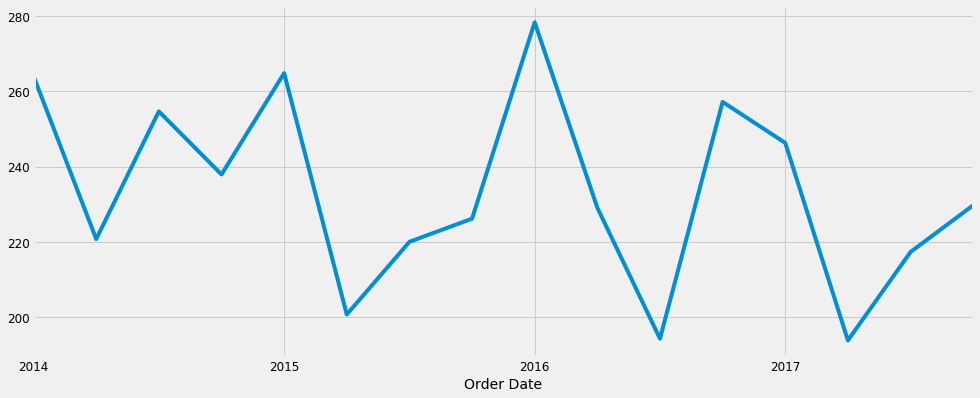

In [57]:
Q.plot(figsize = (15, 6))
plt.show()

In [58]:
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [59]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:661.5238453481245
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1529.5975717593867
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:402.0746678479151

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)



ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:396.8202649808119
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:568.0812131278186
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:563.3702893253451
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:395.73870136528853
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:397.7103607987758
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:624.7073376670585


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1810.2307138583185
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:404.0572383632062
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:398.30739030835707
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:565.8511871066885
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:563.4641112701669
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:397.2652484384533
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:399.11662450993884
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:539.8605974537222


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1514.0760487638804
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:413.4421987150406
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:411.771186820049
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:540.1473655055304


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1789.0596746852234
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:411.1502241605039
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:413.03496187670663
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:505.2494190718203


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1816.4781104990082
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:397.56646108395853
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:393.231141794608
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:507.0099455851324


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2331.726866436196
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:392.09332875534426
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:394.0906684771758
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:553.994504891966


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2197.918658399557
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:404.0620300756028
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:398.38088151787224
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:552.9272857949779
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:553.5803860727674
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:397.27571034278105
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:399.14714147390845
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:520.9347425712448


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2067.7512681551234
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:405.50341283576466
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:397.07526374398327


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:522.7532196361194
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:524.7494540758955
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:396.0818242406445
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:397.9267379149009
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:519.8818905467281


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2024.2579195360843
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:408.05937080549637
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:402.67176668680275
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:521.8609414870002


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2409.3859416404443
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:399.8530806573022
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:401.49865807993854
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:505.5628866933268


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1925.9099531342902
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:399.56190080713714
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:395.0251886261328
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:507.5224773702268


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1840.8680552923047
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:393.8481987643704
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:395.8117139867968


In [60]:
model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 0),
                                  seasonal_order = (0, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4472      0.194     -2.302      0.021      -0.828      -0.066
sigma2      6004.7974   1564.708      3.838      0.000    2938.026    9071.569


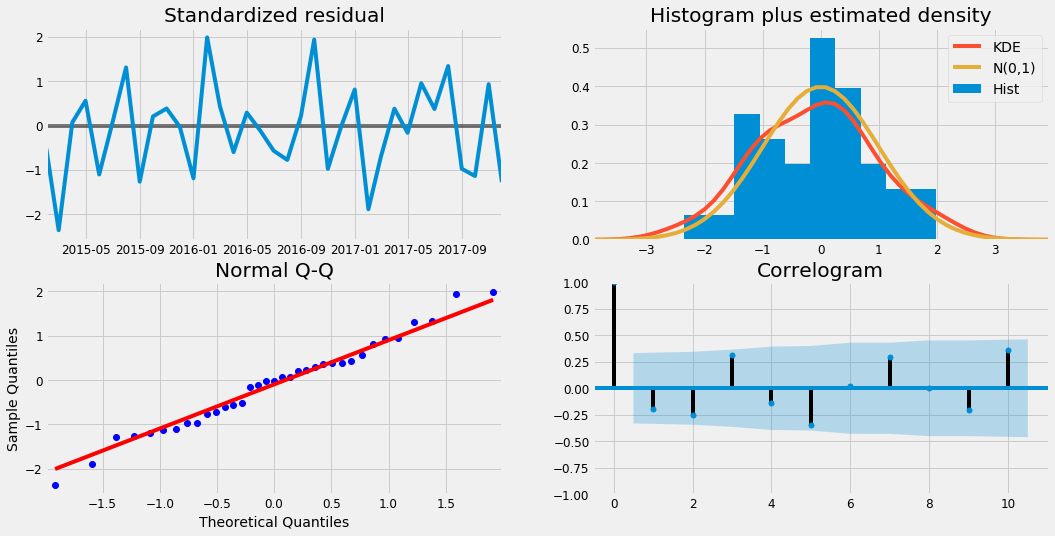

In [61]:
result.plot_diagnostics(figsize = (16, 8))
plt.show()

In [62]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Sales,upper Sales
Order Date,,
2017-01-01,68.853728,372.611408
2017-02-01,183.831151,487.588830
2017-03-01,150.931759,454.689438
2017-04-01,-1.546783,302.210896
2017-05-01,43.582374,347.340053
2017-06-01,-9.529094,294.228585
2017-07-01,19.449419,323.207098
2017-08-01,33.694797,337.452476
2017-09-01,114.895119,418.652798


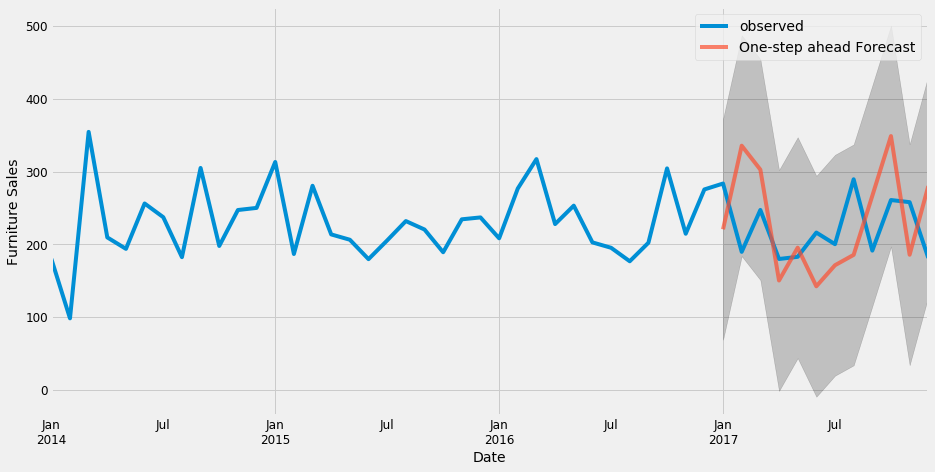

In [63]:
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [64]:
y_hat = prediction.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))


The Mean Squared Error of our forecasts is 6239.38
The Root Mean Squared Error of our forecasts is 78.99


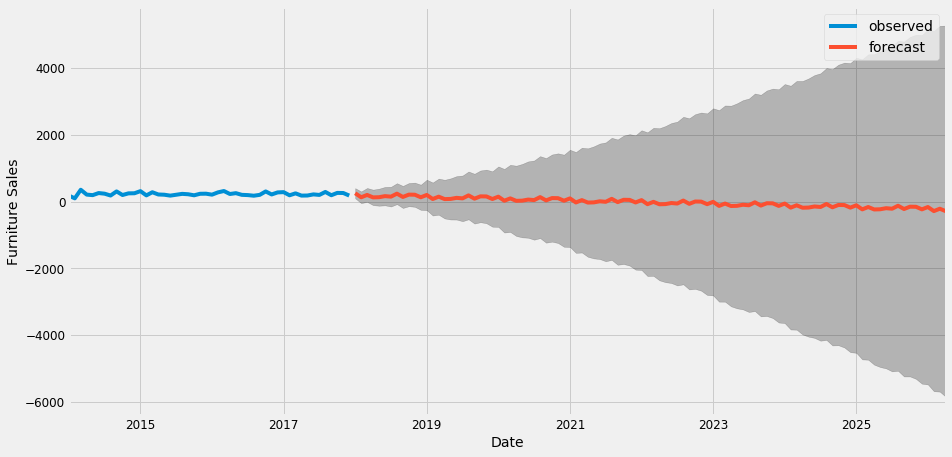

In [65]:
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [66]:
from statsmodels.tsa.stattools import adfuller
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.286567
p-value: 0.015490
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


In [67]:
from statsmodels.tsa.stattools import kpss
from pandas import Series
result = kpss(y)
print('kpss Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

kpss Statistic: 0.110239
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


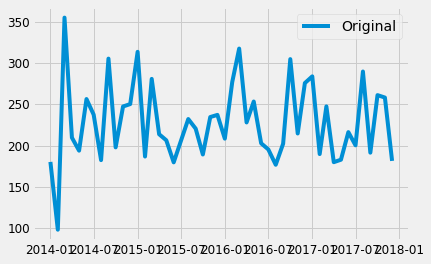

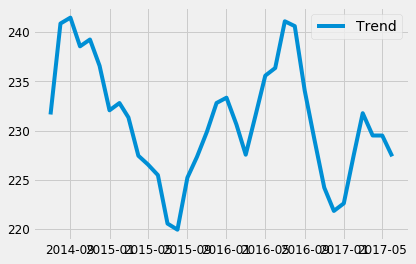

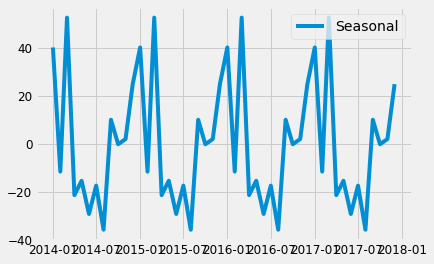

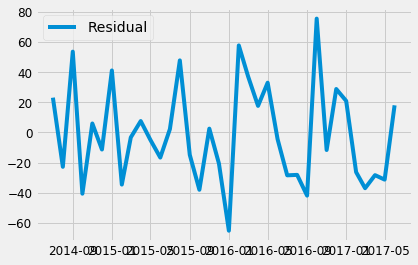

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')